# **R**eceptionist dealing with **B**ooki**n**g **B**attles (RBnB): A Learning Through Hotel Cancellations

# As a receptionist at an hotel...  
I have witnessed firsthand the constant stream of guests checking in and out, each reservation adding to the vibrant rhythm of our establishment. Yet, amidst the flurry of activity, there is a persistent challenge that weighs heavily on our operations - the uncertainty of cancellations. And that, for me, means **P R E D I C T I O N**.  

Every day, I see rooms left vacant due to last-minute cancellations, leaving us scrambling to fill the void and manage our resources effectively. Determined to make a difference, I have taken on the role of a data scientist (because I am one) leveraging my analytical skills to help our hotel thrive (the best I can, obviously).  

With a keen eye for patterns and a passion for problem-solving, I have delved into our hypothetical booking data, uncovering insights that hold the potential to transform our approach. Armed with the tools of supervised machine learning, I am building a classification model tailored to predict the likelihood of a booking being canceled.  

Countries, number of bookings and special requests - these are just a few of the variables I am scrutinizing, each offering valuable clues that could inform our predictive model. By harnessing the power of data, I am determined to empower our team with the foresight needed to anticipate cancellations and mitigate their impact on our business.  

As a receptionist-turned-data-scientist, I am driven by a dual purpose - to provide exceptional service to our guests while also helping our hotel thrive in an ever-changing landscape. With each step forward, I am excited to see the impact of data-driven decision-making on our operations, paving the way for a brighter future for our hotel.  



In this project, I will be working with a database where the **target variable, 'is_canceled,' has already been labeled**. This indicates that the project falls under **supervised learning**, where the model learns from labeled data. The task at hand is a **classification problem**, as the objective is to predict whether a booking will be canceled or not

# Import Libraries

In [27]:
import warnings
warnings.filterwarnings('ignore')

import bootcampviztools as bt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Let's have a look on the dataset

In [28]:
# Read dataset
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### A total of 119,390 entries spread across:  
#### - 36 columns, of which
####  -  16 are of type object, and
####  -  20 are numerical of type int64/float64


## Describe features

| Index | Variable                     | Description                                                                      |
|-------|------------------------------|----------------------------------------------------------------------------------|
| 1     | hotel                        | Type of hotel (Resort Hotel, City Hotel)                                         |
| 2     | **is_canceled**                  | **Reservation cancellation status (0 = not canceled, 1 = canceled)**                  |
| 3     | lead_time                    | Number of days between booking and arrival                                       |
| 4     | arrival_date_year            | Year of arrival                                                                  |
| 5     | arrival_date_month           | Month of arrival                                                                 |
| 6     | arrival_date_week_number     | Week number of the year for arrival                                              |
| 7     | arrival_date_day_of_month    | Day of the month of arrival                                                      |
| 8     | stays_in_weekend_nights      | Number of weekend nights (Saturday and Sunday) the guest stayed or booked         |
| 9     | stays_in_week_nights         | Number of week nights the guest stayed or booked                                  |
| 10    | adults                       | Number of adults                                                                 |
| 11    | children                     | Number of children                                                               |
| 12    | babies                       | Number of babies                                                                 |
| 13    | meal                         | Type of meal booked (BB, FB, HB, SC, Undefined)                                  |
| 14    | country                      | Country of origin of the guest                                                   |
| 15    | market_segment               | Market segment designation                                                        |
| 16    | distribution_channel         | Booking distribution channel                                                      |
| 17    | is_repeated_guest            | If the guest is a repeat customer (0 = not repeated, 1 = repeated)               |
| 18    | previous_cancellations       | Number of previous bookings that were canceled by the customer                    |
| 19    | previous_bookings_not_canceled | Number of previous bookings that were not canceled by the customer                |
| 20    | reserved_room_type          | Type of reserved room                                                            |
| 21    | assigned_room_type          | Type of assigned room                                                            |
| 22    | booking_changes             | Number of changes made to the booking                                            |
| 23    | deposit_type                | Type of deposit made (No Deposit, Refundable, Non Refund)                        |
| 24    | agent                       | ID of the travel agent responsible for the booking                                |
| 25    | company                     | ID of the company responsible for the booking                                     |
| 26    | days_in_waiting_list        | Number of days the booking was in the waiting list                                |
| 27    | customer_type               | Type of customer (Transient, Contract, Transient-Party, Group)                   |
| 28    | adr                         | Average Daily Rate                                                               |
| 29    | required_car_parking_spaces | Number of car parking spaces required                                             |
| 30    | total_of_special_requests   | Number of special requests made                                                  |
| 31    | reservation_status          | Last reservation status (Check-Out, Canceled, No-Show)                            |
| 32    | reservation_status_date     | Date of the last reservation status                                               |
| 33    | name                        | Guest's name                                                                     |
| 34    | email                       | Guest's email address                                                            |
| 35    | phone-number                | Guest's phone number                                                             |
| 36    | credit_card                 | Last four digits of the guest's credit card                                       |

# Missing values

#### Features with missing values:
- children (4 missing values)  
- country (488 missing values)  
- agent (16,340 missing values)  
- company (112,593 missing values -> *Note: This is quite significant*)"

### Calculamos el porcentaje de nulos en cada columna y lo enseñamos 
### Let's calculate and show the ratio of missing values for each feature
### Prenons le soin de calculer puis de visualiser les données manquantes pour chaque variable

In [30]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [31]:
missing_values_percentage[missing_values_percentage > 0]


children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

------------------------
####  **'company'** could be a great candidate for anticipating if a customer is going to cancel, because I see now, being a receptionist, that there are more cancellations with the website Bookings than with Expedia, for example, or Keytel, Utell, HotelBeds.  

#### It is also true that a cancellation - or rather a "no-show" - often occurs when the reservation is made over the phone.  

 
#### But 'company' has too many missing values, so we remove it.  

#### We also remove 'agent', because knowing the ID of each client is unlikely to be relevant for this prediction model.  

#### I will keep 'children', as it only has 4 missing values.    

#### I will keep 'country' just in case, because it could be relevant, but I will have to process it as it will be impossible to perform visual analysis

----------------------


#### Let's process 'country"

In [32]:
#top 10 of countries of origin
top_countries = df['country'].value_counts().nlargest(10).index.tolist()

# Function to assign "Others" to each country if it does not belong to the top 10 list:

def map_to_top_countries(country):
    return country if country in top_countries else 'Others'

# Apply and add a new column 'top_countries'
df['top_countries'] = df['country'].apply(map_to_top_countries)

In [33]:
top_countries

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

---------------
---------------

    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'FRA': 'France',
    'ESP': 'Spain',
    'DEU': 'Germany',
    'ITA': 'Italy',
    'IRL': 'Ireland',
    'BEL': 'Belgium',
    'BRA': 'Brazil',
    'NLD': 'Netherlands'
-----
-----

In [34]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,top_countries
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,PRT
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,PRT
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,GBR
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,GBR
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,BEL
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,FRA
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,DEU
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,GBR


#### I can remove now 'country'...

In [35]:
df.drop(columns=['country'], inplace=True)

#### ... and I do not forget to remove 'agent' and 'company'

In [36]:
df.drop(columns=['agent', 'company'], inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### -> **Almost there**: I decide to handle the 4 missing values in 'children' by simply removing the associated rows, as we will not reasonably lose any information (4/119390)."

In [38]:
df.dropna(inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal                 

**********
********
********
# Supervised model: the **target** is "is_canceled'
*******
**********
*********

In [40]:
target = 'is_canceled'

### Categoric features:

In [41]:
features_cat = df.select_dtypes(include = "object").columns.to_list()
features_cat

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card',
 'top_countries']

## -> However, I can include the following numeric variables which are categorical as well:
- 'is_canceled'
- 'arrival_date_year'
- 'is_repeated_guest'
- 'agent'
- 'company'
- 'customer_type'
## -> I won't add 'is_canceled' because it is the target, and it will be useful for the miniEDA later on.

In [42]:
features_cat = ['hotel',
                'arrival_date_month',
                'meal',
                'country',
                'market_segment',
                'distribution_channel',
                'reserved_room_type',
                'assigned_room_type',
                'deposit_type',
                'customer_type',
                'reservation_status',
                'reservation_status_date',
                'name',
                'email',
                'phone-number',
                'credit_card',
               # 'is_canceled', 
                'arrival_date_year',
                'is_repeated_guest', 
                'agent',
                'company']


In [43]:
# convert the features into object type
for column in features_cat:
    if column in df.columns:
        df[column] = df[column].astype(str)

In [44]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                     

## Now I analyze the features such as their distribution range, mode, mean...

In [45]:
#las numericas
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.087121,0.137102,0.221131,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.844350,1.497462,0.652315,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


## algunas cosas que hay que tener en cuenta Y que voy a analizar mas abajo, en la parte 3 de la limpieza:

### - adr: Average Daily Rate (ADR) - represents how much a guest pays on average for a room for 1 day.

####   -Something strange is happening because ADR has a minimum value of -6.38.
####      -Error? We need to ask the company.

### adults: Minimum value of 0 and maximum of 55.

####    - Something strange is happening because it means there are either 0 adults or 55 adults.
####      - Error? Based on my experience as a receptionist, 0 adults could also mean a room with only children and no adults (which is quite common).   Further investigation is needed.

### children and babies: Maximum value of 10.

####    - Something strange is happening because having 10 children or babies in 1 room is practically impossible.
####        - Error? It's better to ask the company for more context.


In [46]:
#las caterogicas (lo vamos a observar de manera vertical)
df.describe(include='object').T

,count,unique,top,freq
hotel,119386,2,City Hotel,79326
arrival_date_year,119386,3,2016,56707
arrival_date_month,119386,12,August,13873
meal,119386,5,BB,92306
market_segment,119386,7,Online TA,56476
distribution_channel,119386,5,TA/TO,97870
is_repeated_guest,119386,2,0,115576
reserved_room_type,119386,10,A,85994
assigned_room_type,119386,12,A,74053
deposit_type,119386,3,No Deposit,104637


# **Data Cleaning**

## ***First observation:***


If I want to predict if a client is going to cancel, I cannot rely on the following variables:
- reservation_status,
- reservation_status_date,
- assigned_room_type,

Because they are directly related to the target "is_canceled", so it will harm my prediction because at the time of predicting if the client is going to cancel, **I will not have access to these variables**.  
This is what is called **data leakage:** "happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction."

*For example, assigned_room_type determines what type of room has been assigned to the client -> so the client is already in the hotel and it doesn't make sense to know if they are going to cancel their reservation..*

In [47]:
df = df.drop(['assigned_room_type', 'reservation_status','reservation_status_date'], axis=1)

## ***Second observation***
I remove 'name', 'email', 'phone-number', 'credit_card' because they are not relevant to my model.  

### ***Bis***
But before removing 'name', I observe that *Michael Johnson* appears *48 times*, which means he has come 48 times.  
This makes me think that it would be a good idea to have the *frequency of each client based on the 'names' column*, to see if it is related to the cancellation of a reservation.   -> Complementary to 'is_repeated_guest'.

In [48]:
df['number_of_bookings'] = df.groupby('name')['name'].transform('count')

In [49]:
df.number_of_bookings.value_counts()

number_of_bookings
1     62853
2     22538
3     11034
4      6064
5      3850
6      2574
7      2009
8      1464
9      1062
10      800
11      616
12      576
13      546
14      462
16      416
15      240
20      220
17      204
21      189
18      180
22      176
23      161
19      152
27      135
26      104
25      100
48       96
29       87
24       72
28       56
47       47
46       46
44       44
42       42
39       39
36       36
35       35
31       31
30       30
Name: count, dtype: int64

In [50]:
#now I can remove the other ones:

df = df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  object 
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal                 

## ***Third observation***
#### **The ''cosas que hay que tener en cuenta''**, or "things to consider"

In [52]:
cosas_que_hay_que_tener_en_cuenta = {
    'adr<0':      df[df['adr'] < 0],
    'adults_0':   df[df['adults'] == 0],
    'adults_55':   df[df['adults'] == 55],
    'children_10': df[df['children'] == 10],
    'babies_10':   df[df['babies'] == 10],
}


In [53]:
cosas_que_hay_que_tener_en_cuenta_count = {key: len(value) for key, value in cosas_que_hay_que_tener_en_cuenta.items()}
cosas_que_hay_que_tener_en_cuenta_count

{'adr<0': 1, 'adults_0': 403, 'adults_55': 1, 'children_10': 1, 'babies_10': 1}

### How to interpret:

- There is 1 reservation with an adr < 0 -> we remove it.
  
- There are 403 reservations with 0 adults -> it may be an error but it doesn't have to be necessarily an error  
       -> it could be rooms with children or babies  
              -> but just in case, AND BECAUSE WE HAVE MANY DATA, we remove these rows.  

- There is 1 reservation with 55 adults  
       -> we remove this row.

- There is 1 reservation with 10 children   
       -> it may be an error but it doesn't have to be necessarily an error  
              -> it could be a room with children or babies  
                      -> but just in case, AND BECAUSE WE HAVE MANY DATA, we remove this row.  
  
- There is 1 reservation with 10 babies   
        -> there it is probably an error   
                -> we remove it.  


In [54]:
df = df[df['adr'] > 0]

df = df[df['adults'] != 0]

df = df[df['children'] != 10]

df = df[df['babies'] != 10]

# Reset the index
df.reset_index(drop=True, inplace=True)


In [55]:
# Check if the datafrae is clean
cosas_que_hay_que_tener_en_cuenta_fuera = {
    'adr<0': df[df['adr'] < 0],
    'adults_0': df[df['adults'] == 0],
    'adults_55': df[df['adults'] == 55],
    'children_10': df[df['children'] == 10],
    'babies_10': df[df['babies'] == 10],
}

cosas_que_hay_que_tener_en_cuenta_fuera_count = {key: len(value) for key, value in cosas_que_hay_que_tener_en_cuenta_fuera.items()}
cosas_que_hay_que_tener_en_cuenta_fuera_count

{'adr<0': 0, 'adults_0': 0, 'adults_55': 0, 'children_10': 0, 'babies_10': 0}

# Distribution of the target:

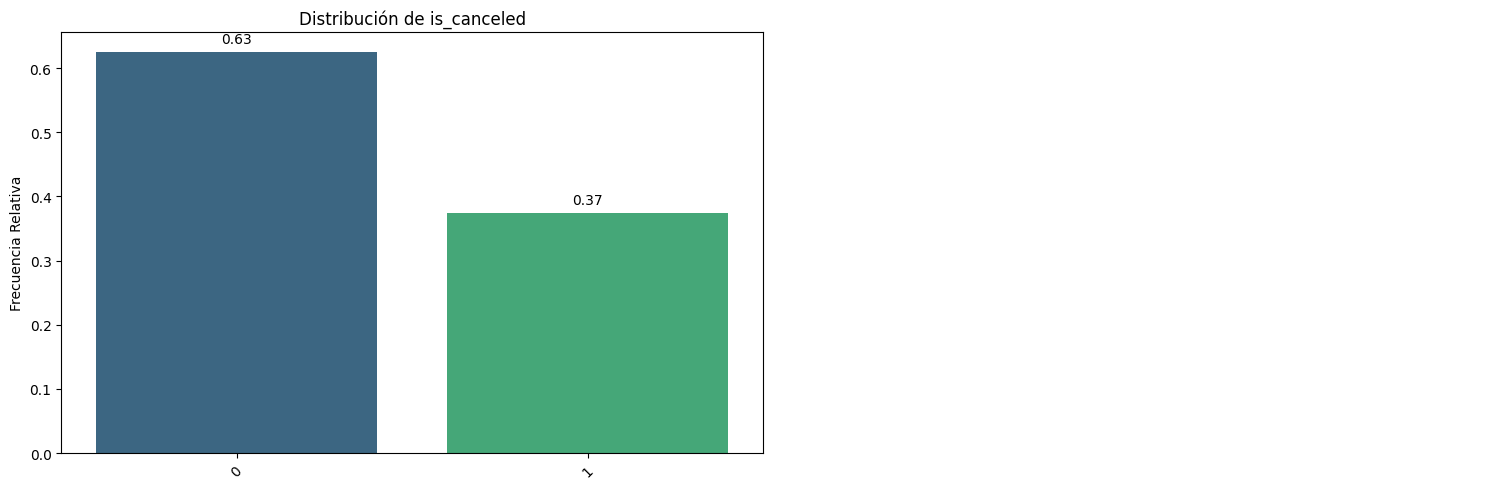

In [56]:
bt.pinta_distribucion_categoricas(df, [target], relativa= True, mostrar_valores= True)

## The target variable is imbalanced with 63% not canceling compared to 37% canceling. This imbalance needs to be taken into account, for example, using class weights (GridSearch will also help us choose the best possible combination).


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117176 entries, 0 to 117175
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117176 non-null  object 
 1   is_canceled                     117176 non-null  int64  
 2   lead_time                       117176 non-null  int64  
 3   arrival_date_year               117176 non-null  object 
 4   arrival_date_month              117176 non-null  object 
 5   arrival_date_week_number        117176 non-null  int64  
 6   arrival_date_day_of_month       117176 non-null  int64  
 7   stays_in_weekend_nights         117176 non-null  int64  
 8   stays_in_week_nights            117176 non-null  int64  
 9   adults                          117176 non-null  int64  
 10  children                        117176 non-null  float64
 11  babies                          117176 non-null  int64  
 12  meal            

# Analysis / MiniEDA

In [58]:
#  features_cat_sel is the same as features_cat but I have removed several variables that are no longer there

features_cat_sel = ['hotel',
                'arrival_date_month',
                'arrival_date_year',
                'meal',
                'market_segment',
                'distribution_channel',
                'reserved_room_type',
                'deposit_type',
                'customer_type',
                'is_repeated_guest',
                'top_countries']

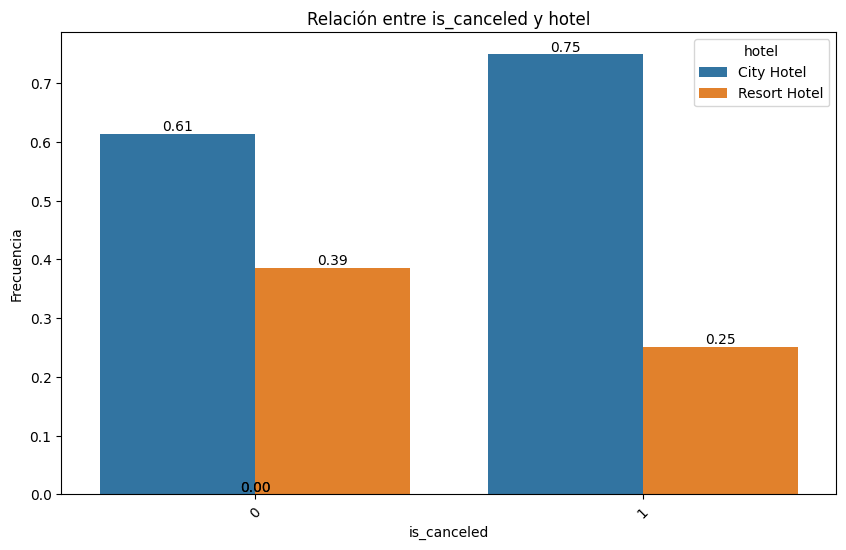

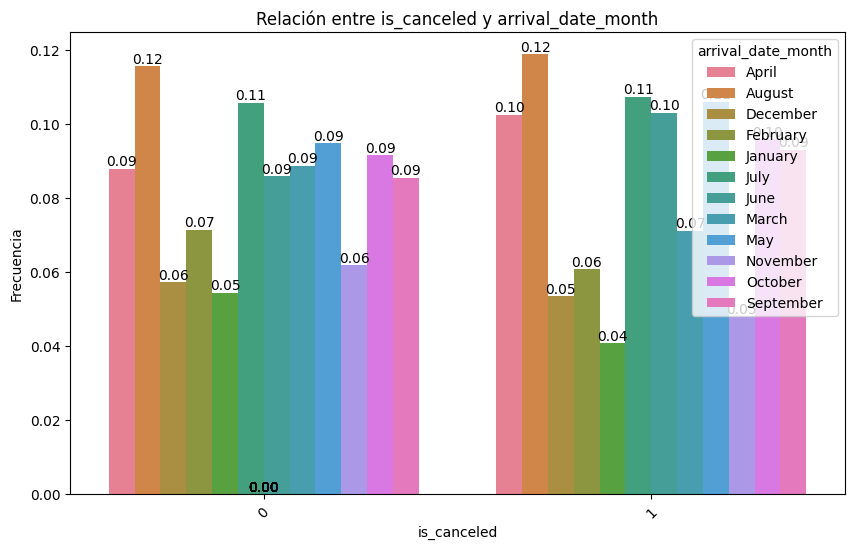

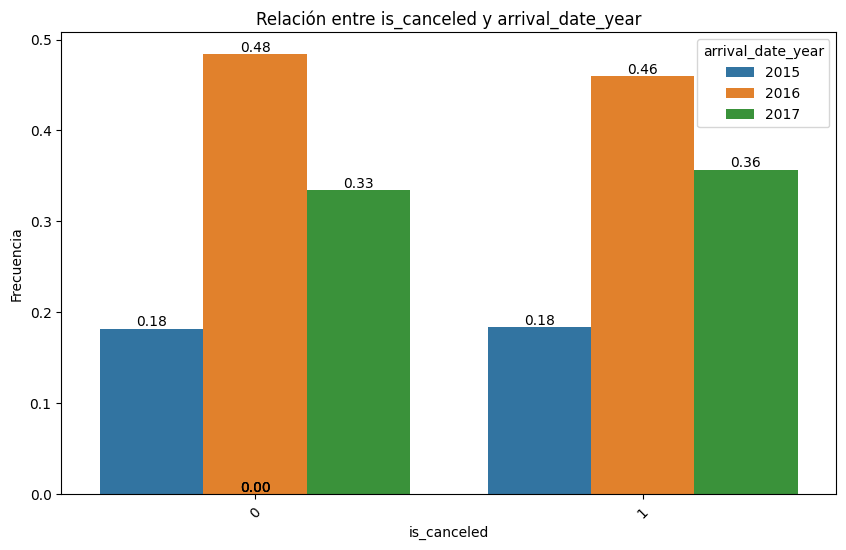

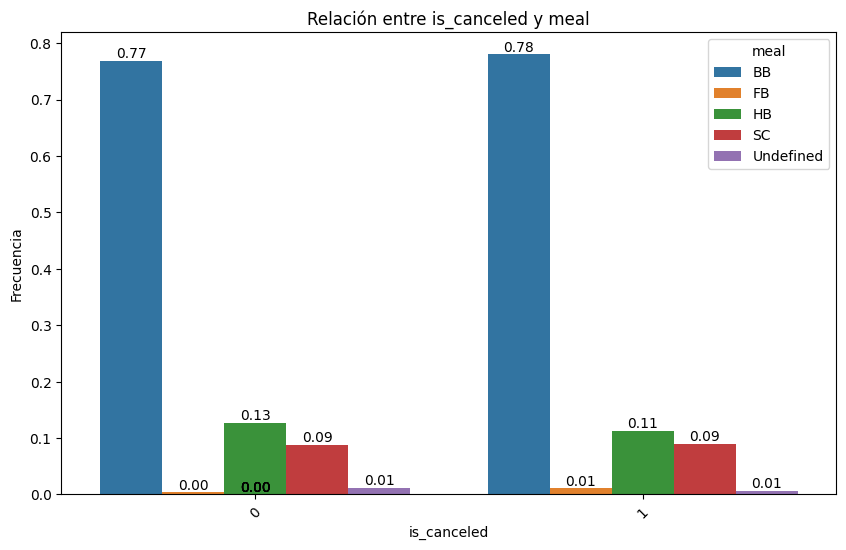

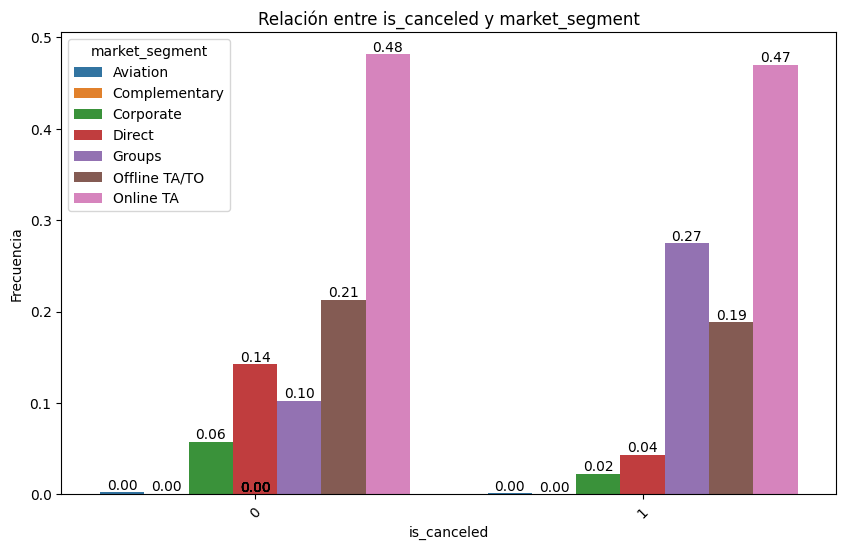

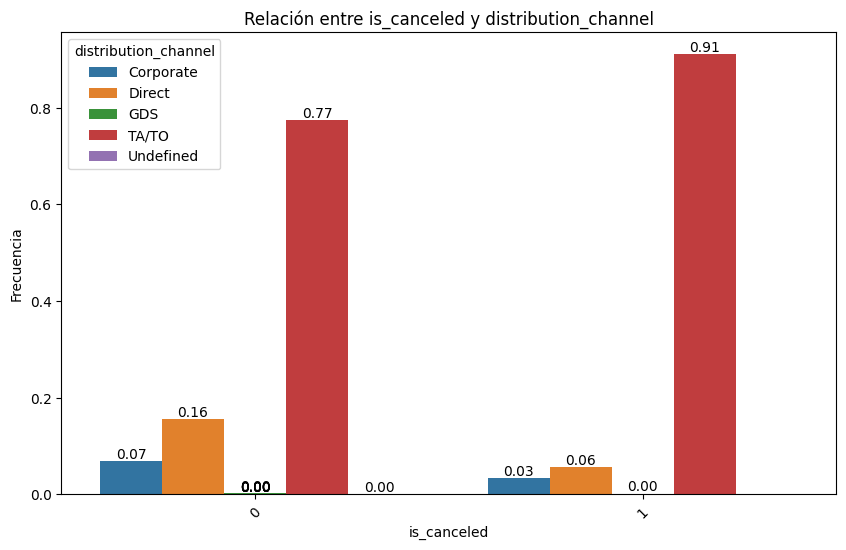

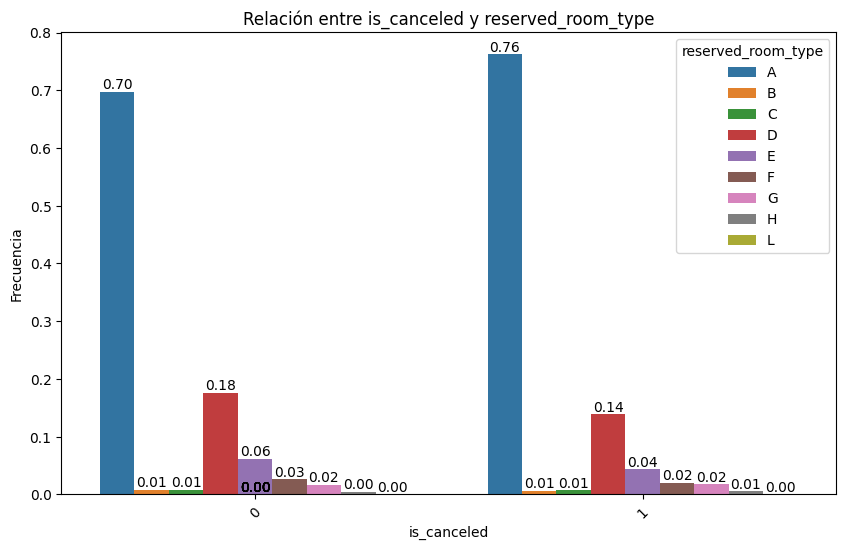

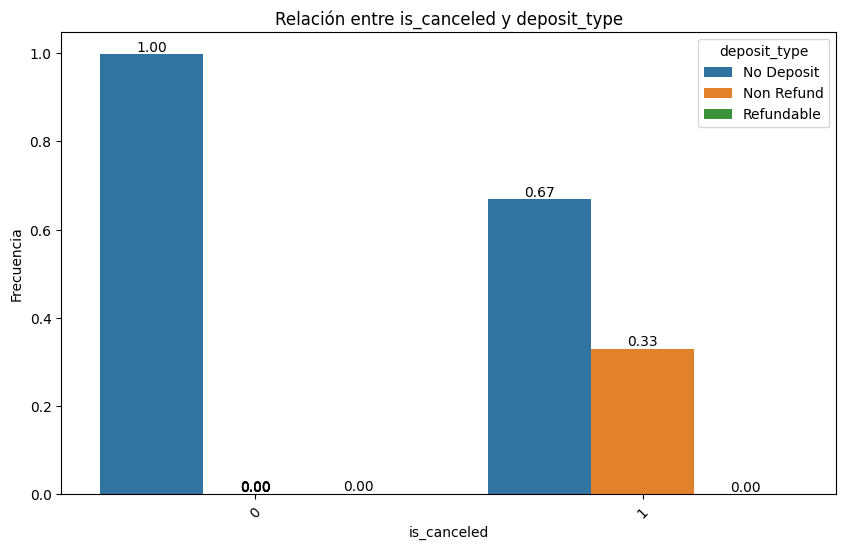

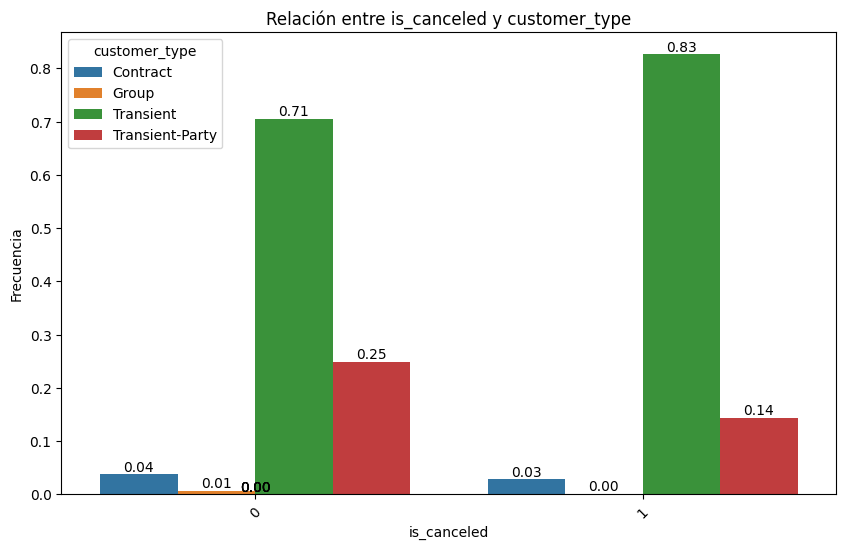

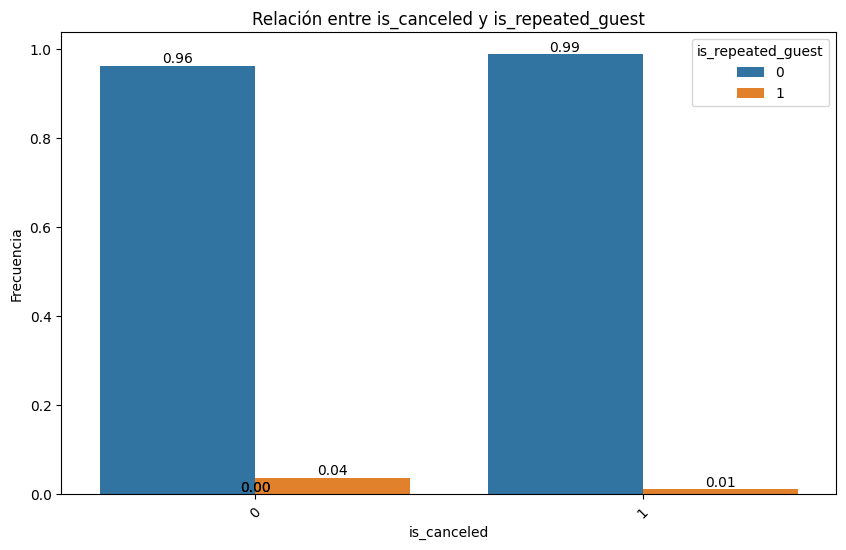

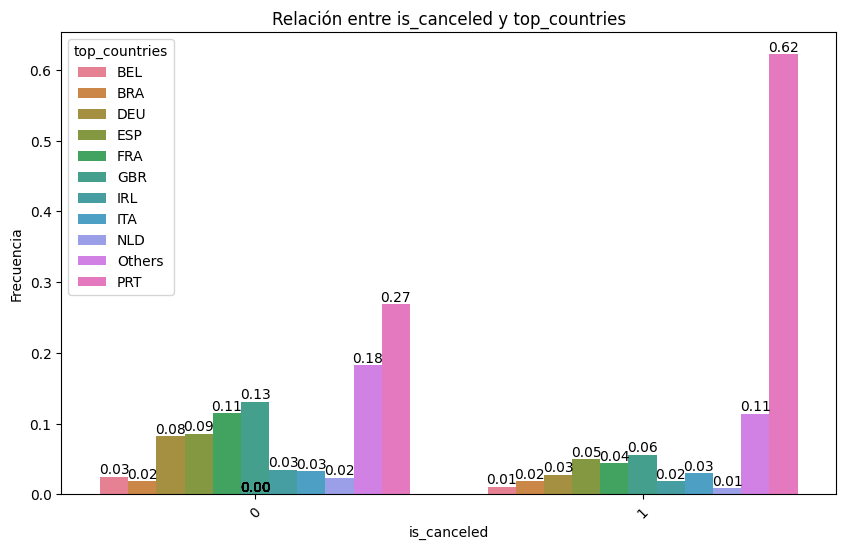

In [59]:
### Analizamos categóricas

for col in features_cat_sel:
    bt.plot_categorical_relationship_fin(df, target, col, relative_freq= True, show_values= True)

In [60]:
features_cat_niv1 = ["hotel","arrival_date_month","market_segment","distribution_channel", "deposit_type","customer_type", "is_repeated_guest", "top_countries"]
features_cat_niv2 = ["reserved_room_type"]
pobrecillas = ["arrival_date_year", "meal"]

In [61]:
#I remove arrival_date_year, as it will not be useful and my model may run faster without it

In [62]:
df = df.drop(['arrival_date_year'], axis=1)

In [63]:
features_num = [col for col in df.columns if col not in features_cat_sel and col != target]
features_num

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'number_of_bookings']

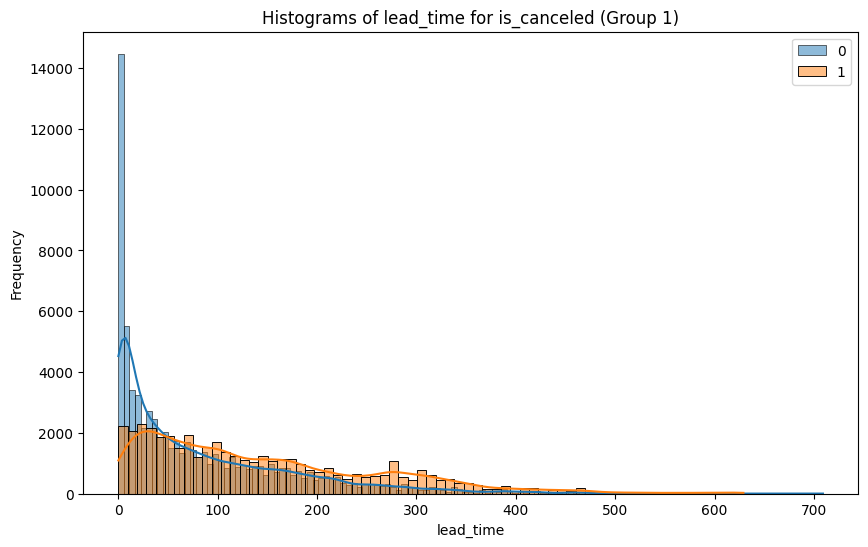

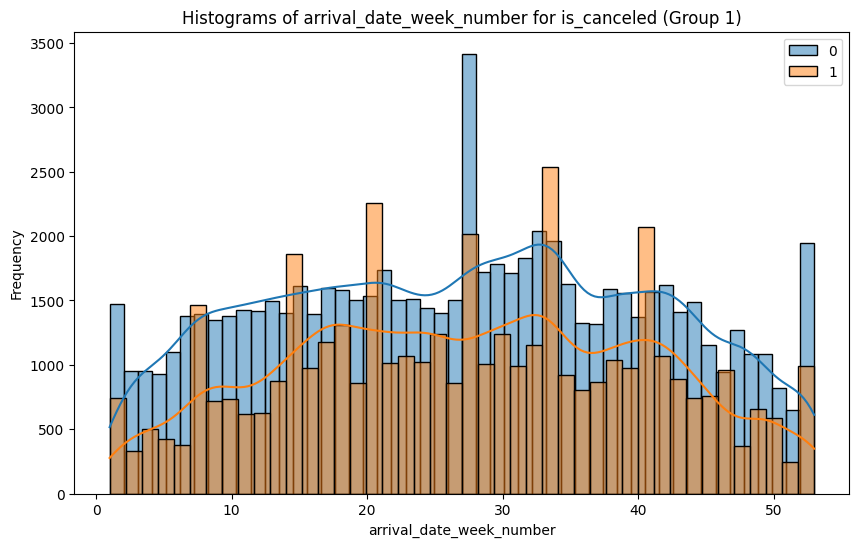

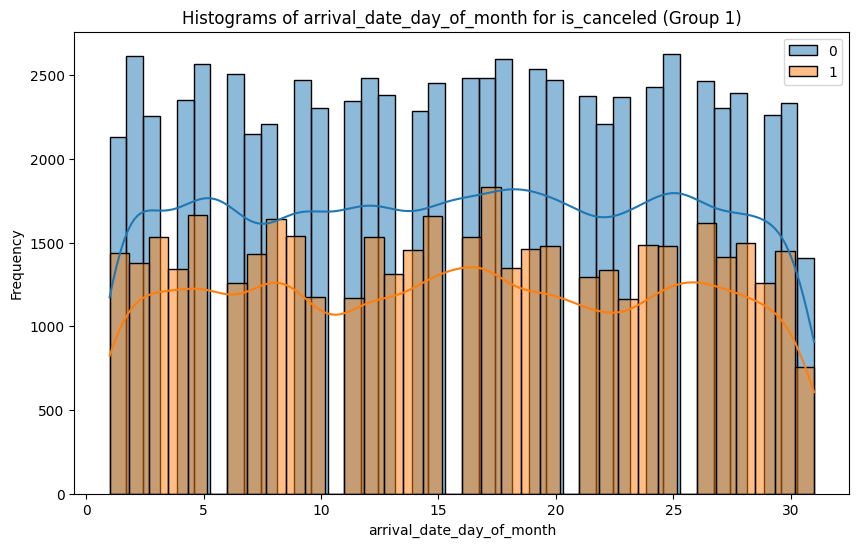

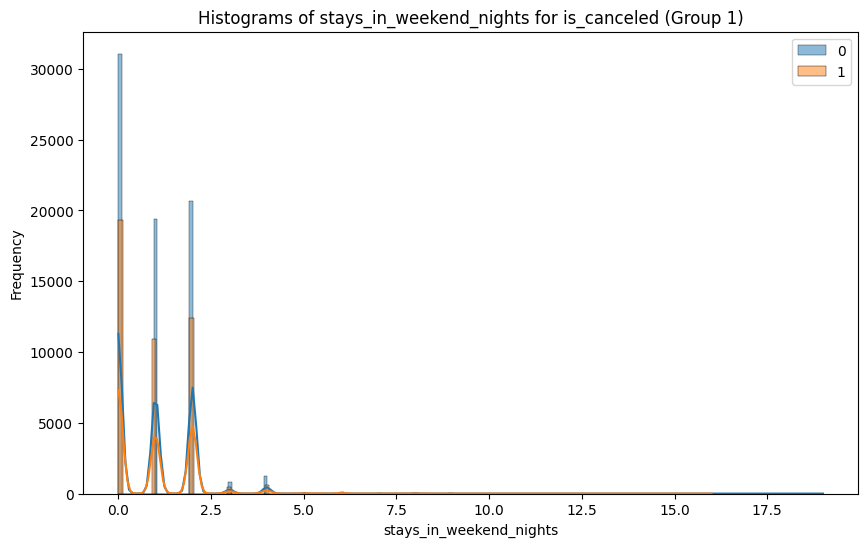

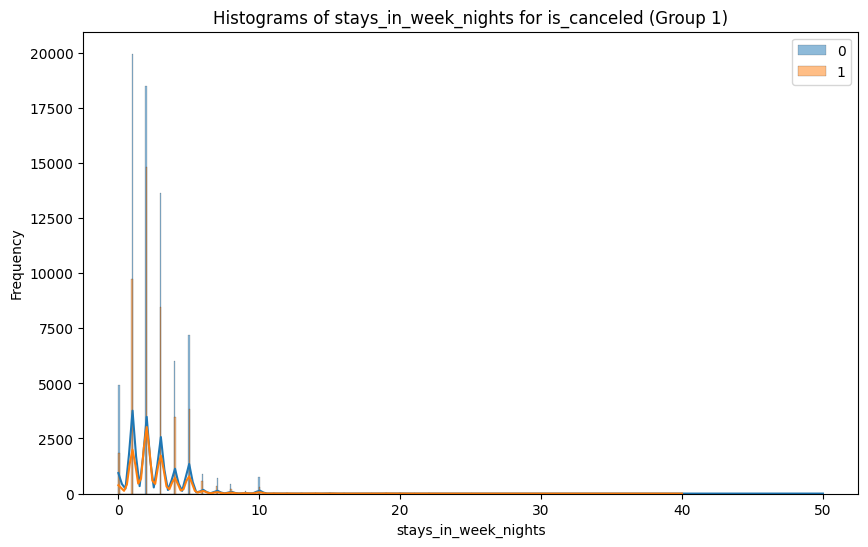

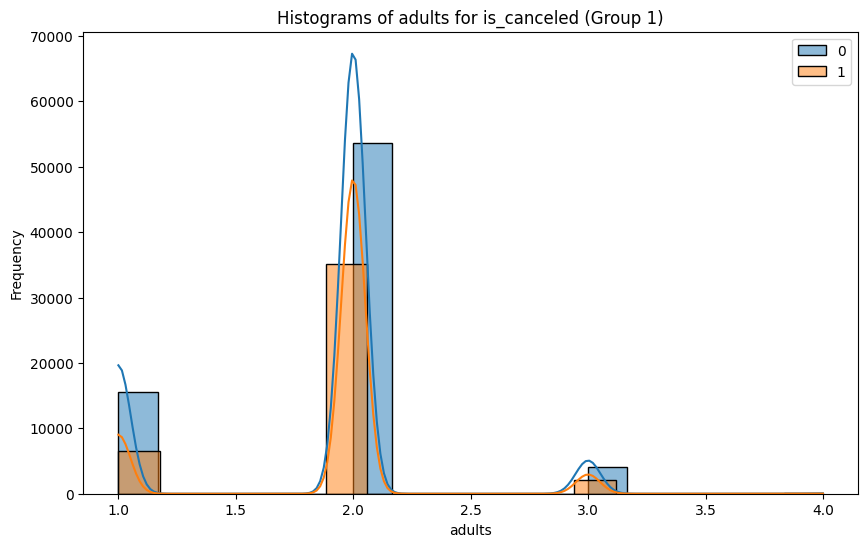

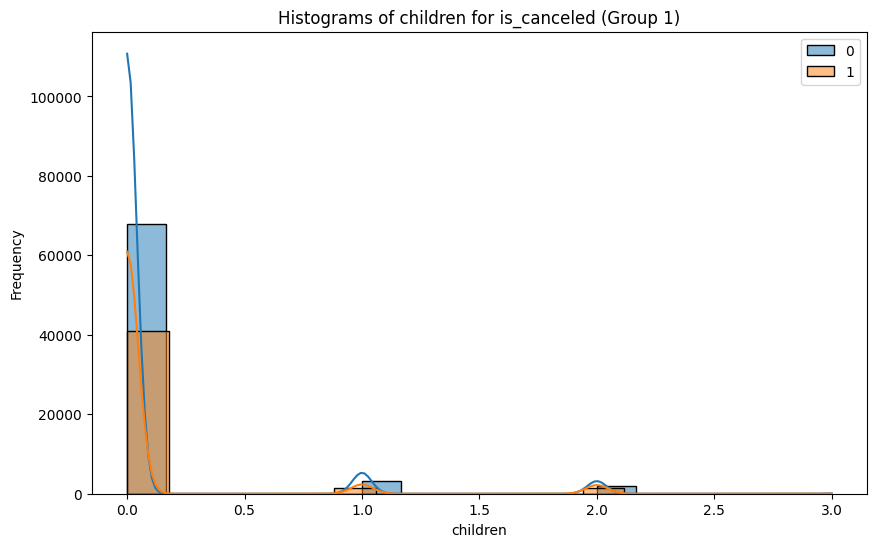

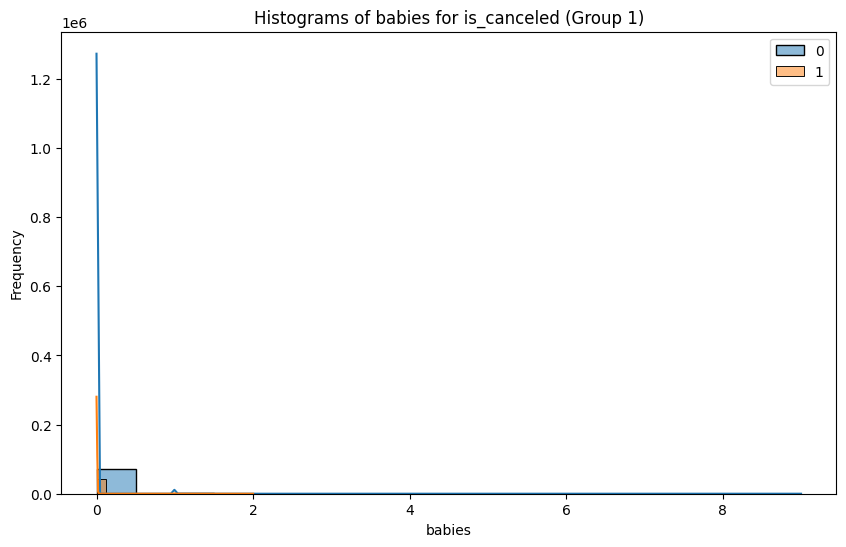

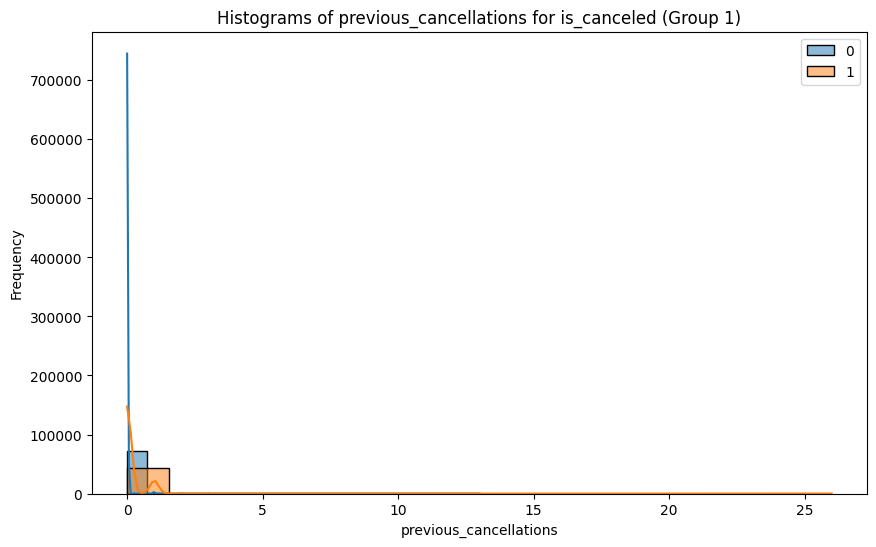

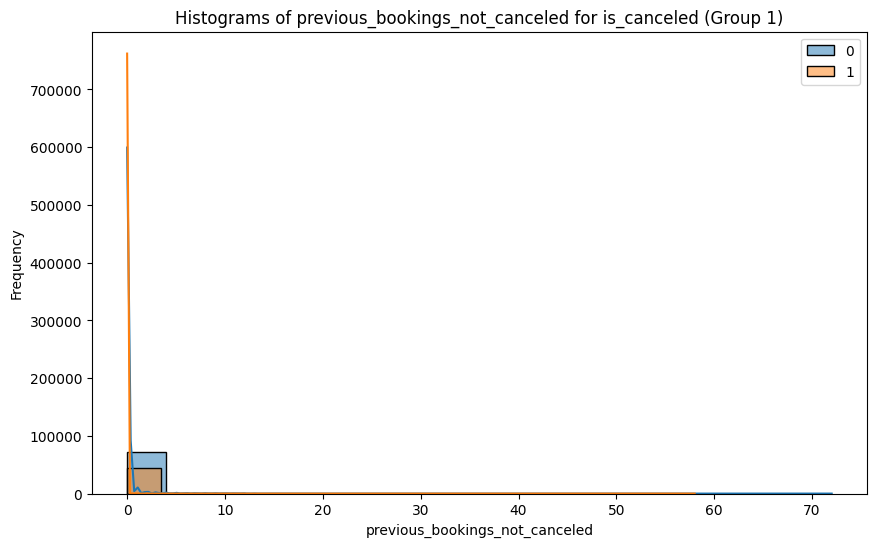

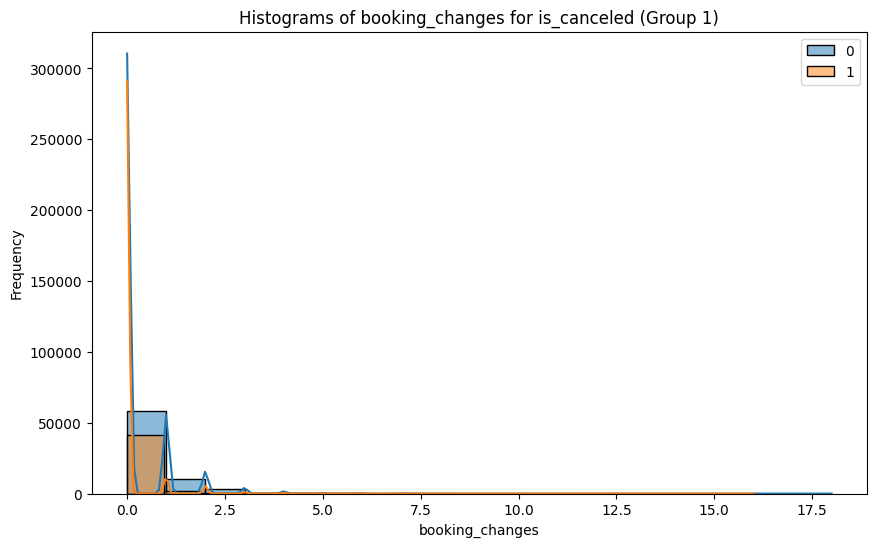

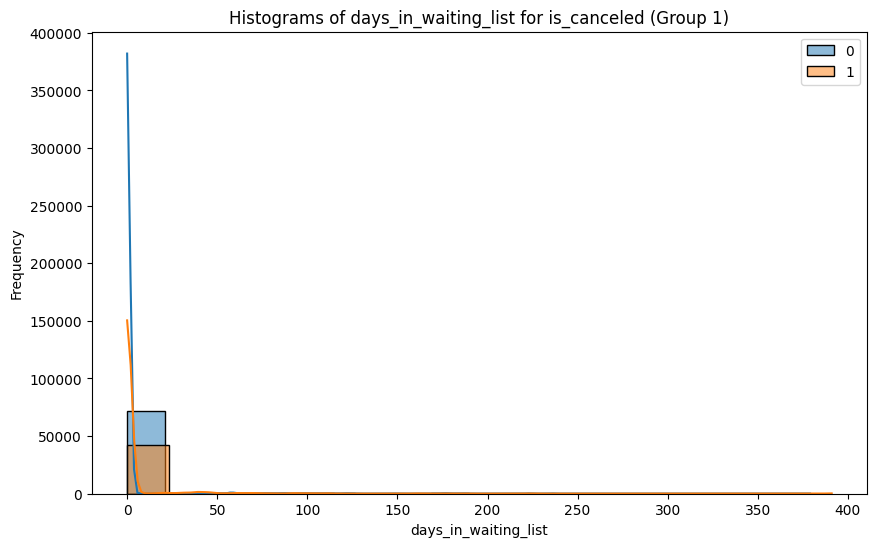

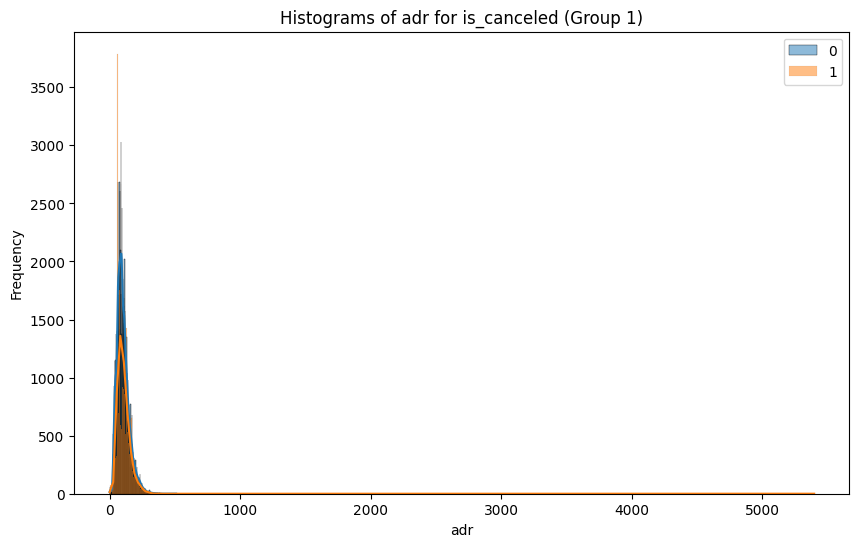

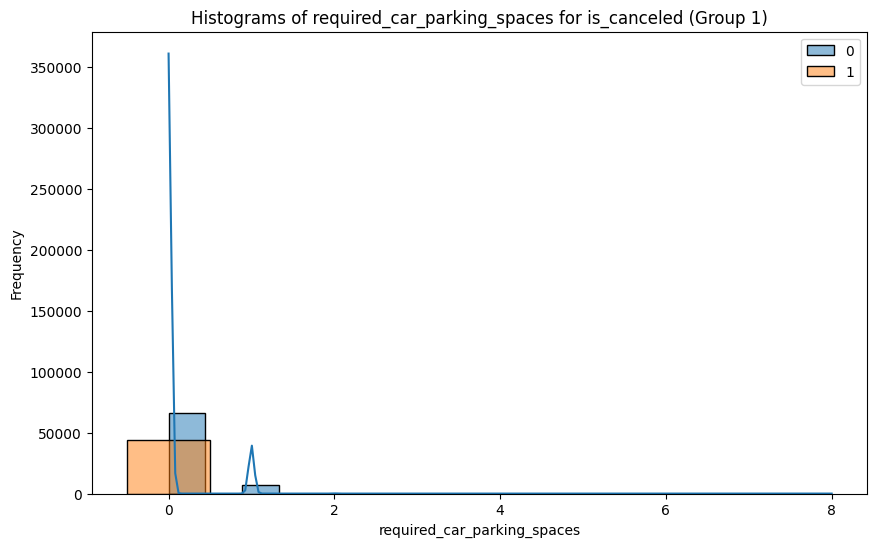

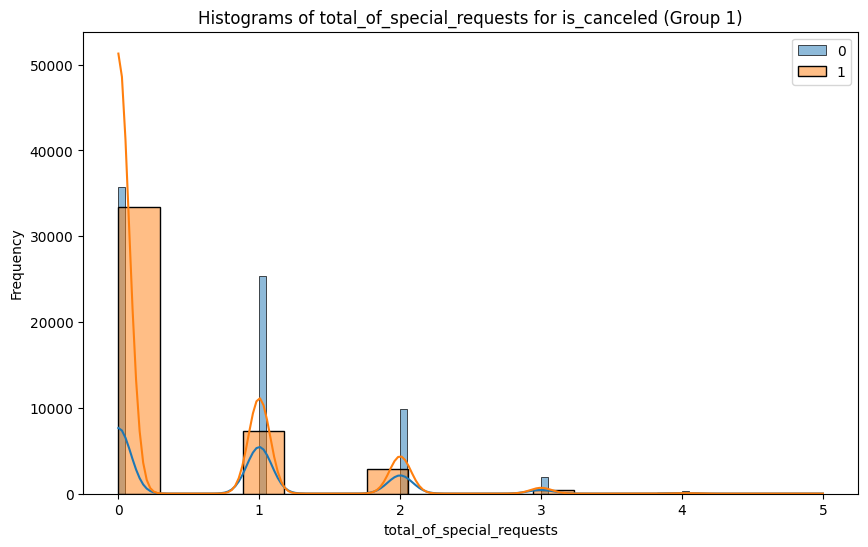

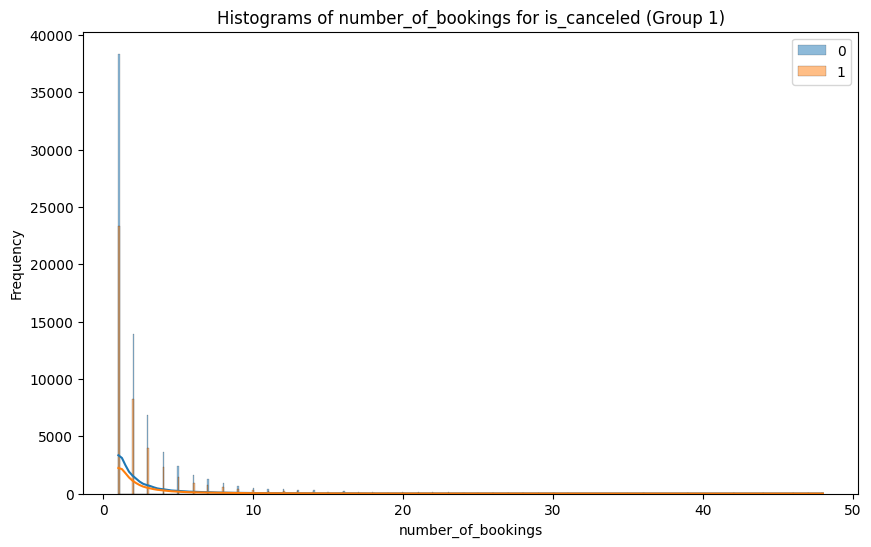

In [64]:
for col in features_num:
    bt.plot_grouped_histograms(df, cat_col= target, num_col= col, group_size= 2)

#### I keep all of them

# Categoric features Encoding 

## Let's apply One-Hot encoding for the categorical variables, except for 'arrival_date_month' which we'll apply Label encoding to because the months have an order.

Let's say that it would be a little bit weird to set 10 to february...

In [65]:
# Convert 'arrival_date_month' in numerical values with label encoding
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

In [66]:
df.arrival_date_month.value_counts()

arrival_date_month
8     13673
7     12456
5     11592
4     10931
10    10913
6     10805
9     10338
3      9620
2      7901
11     6629
12     6537
1      5781
Name: count, dtype: int64

In [67]:
# One-hot encode the mentioned columns below
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'top_countries']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117176 entries, 0 to 117175
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     117176 non-null  int64  
 1   lead_time                       117176 non-null  int64  
 2   arrival_date_month              117176 non-null  int64  
 3   arrival_date_week_number        117176 non-null  int64  
 4   arrival_date_day_of_month       117176 non-null  int64  
 5   stays_in_weekend_nights         117176 non-null  int64  
 6   stays_in_week_nights            117176 non-null  int64  
 7   adults                          117176 non-null  int64  
 8   children                        117176 non-null  float64
 9   babies                          117176 non-null  int64  
 10  is_repeated_guest               117176 non-null  object 
 11  previous_cancellations          117176 non-null  int64  
 12  previous_booking

In [68]:
#I still have to transform  'is_repeated_guest' which is object type
df['is_repeated_guest'] = df['is_repeated_guest'].astype('int64')


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117176 entries, 0 to 117175
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     117176 non-null  int64  
 1   lead_time                       117176 non-null  int64  
 2   arrival_date_month              117176 non-null  int64  
 3   arrival_date_week_number        117176 non-null  int64  
 4   arrival_date_day_of_month       117176 non-null  int64  
 5   stays_in_weekend_nights         117176 non-null  int64  
 6   stays_in_week_nights            117176 non-null  int64  
 7   adults                          117176 non-null  int64  
 8   children                        117176 non-null  float64
 9   babies                          117176 non-null  int64  
 10  is_repeated_guest               117176 non-null  int64  
 11  previous_cancellations          117176 non-null  int64  
 12  previous_booking

# Train/test (#melody)

In [70]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled'] 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
#stratify = y to be sure that is_canceled has the same distribution in train and test


# ***THE MODEL***

## Here I directly expose the model who won the contest of "who will be the best model?" between other models
# **XGBoost**

In [72]:
xgb1 = XGBClassifier(learning_rate=0.05, max_depth=5, n_estimators=200, random_state=0)

In [73]:
xgb1.fit(X_train, y_train,
           verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

### Evaluation against test

In [74]:
xgb1.score(X_test, y_test)

0.8459208055982249

In [75]:
print(classification_report(y_train, xgb1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     58601
           1       0.83      0.75      0.79     35139

    accuracy                           0.85     93740
   macro avg       0.85      0.83      0.84     93740
weighted avg       0.85      0.85      0.85     93740



# Trigger point
## I do have a lot of metrics to read...but which one should I use?
## Answer: **it depends on what I am interested in**.

## Therefore, let's have a little remainder and ask myself: " Why am I doing this?"



      
## *The Challenge of Hotel Booking Cancellations*

### In this project, I am tackling the issue of hotel booking cancellations. I am building a model to predict whether a reservation will be canceled (1) or not (0).  

## *The Cost of Mistakes*

### There are two main types of prediction errors I want to avoid:

### **False Positives**: The model predicts a cancellation, but the guest shows up (costly because it can lead to overbooking and unhappy guests).
### **False Negatives**: The model predicts a stay, but the guest cancels (potentially more costly because the hotel loses out on potential income by holding the room, expecting a cancellation that never comes).  

## *Prioritizing Recall*

### Since a full room earns the hotel revenue, minimizing false negatives (missed cancellations) is crucial.  To achieve this, I will focus on maximizing recall for the "canceled" class (1).   This means the model should accurately identify as many true cancellations as possible.

## *Balancing Accuracy with Precision*

### While minimizing false negatives is important, I also do not want excessive false positives.  Precision ensures the model is not predicting cancellations too frequently, leading to unnecessary overbooking.

## The ***F1-Score***: Finding the Right Balance

## To balance both precision and recall, we will use the **F1-score** as our primary evaluation metric. 
- ### Specifically, we'll focus on the F1-score for the "canceled" class (1).
- ### This ensures our model prioritizes accurate cancellation predictions without creating unnecessary overbooking issues.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    "class_weight": ["balanced",None]
}

# Create the GridSearchCV object
grid_search1 = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=5, n_jobs=-1, scoring = "f1")# here is F1-score

# Fit the GridSearchCV to the data
grid_search1.fit(X_train, y_train)
# Print the best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Score:", grid_search1.best_score_)

In [ ]:
y_pred = grid_search1.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

# **Ok, that is not bad at all!**
### Let's see how to interpret the classification report:

### The XGBoost Model's Performance Breakdown:

### **Accuracy: 87%** -  
#### This metric tells us that the model can correctly classify (canceled or not canceled) roughly 87% of the bookings in the test data.  

### **Cancellation Prediction Precision: 85%** -   
#### This indicates that out of all bookings the model predicted as cancellations, 85% were truly canceled. In simpler terms, the model avoids many false positives (predicting cancellations that don't happen).  

### **Cancellation Recall: 79%** -  
#### This metric shows that the model identified 79% of the actual cancellations in the test data. In other words, it captures a good portion of true cancellations, minimizing false negatives (missed cancellations).  

### **F1-Score for Cancellations: 82%** - 
#### This score combines precision and recall, giving a balanced view of the model's performance for the crucial "canceled" class.  

---------------
----------------
# **Key Takeaways:**

## The model achieves a good overall accuracy (87%).  

## It excels at avoiding false positives (unnecessary predicted cancellations) with a precision of 85%.

## While recall for cancellations is good (79%), there's room for improvement in capturing even more true cancellations.

## The F1-score of 82% reflects a balanced performance between precision and recall for identifying cancellations.

------------
----------



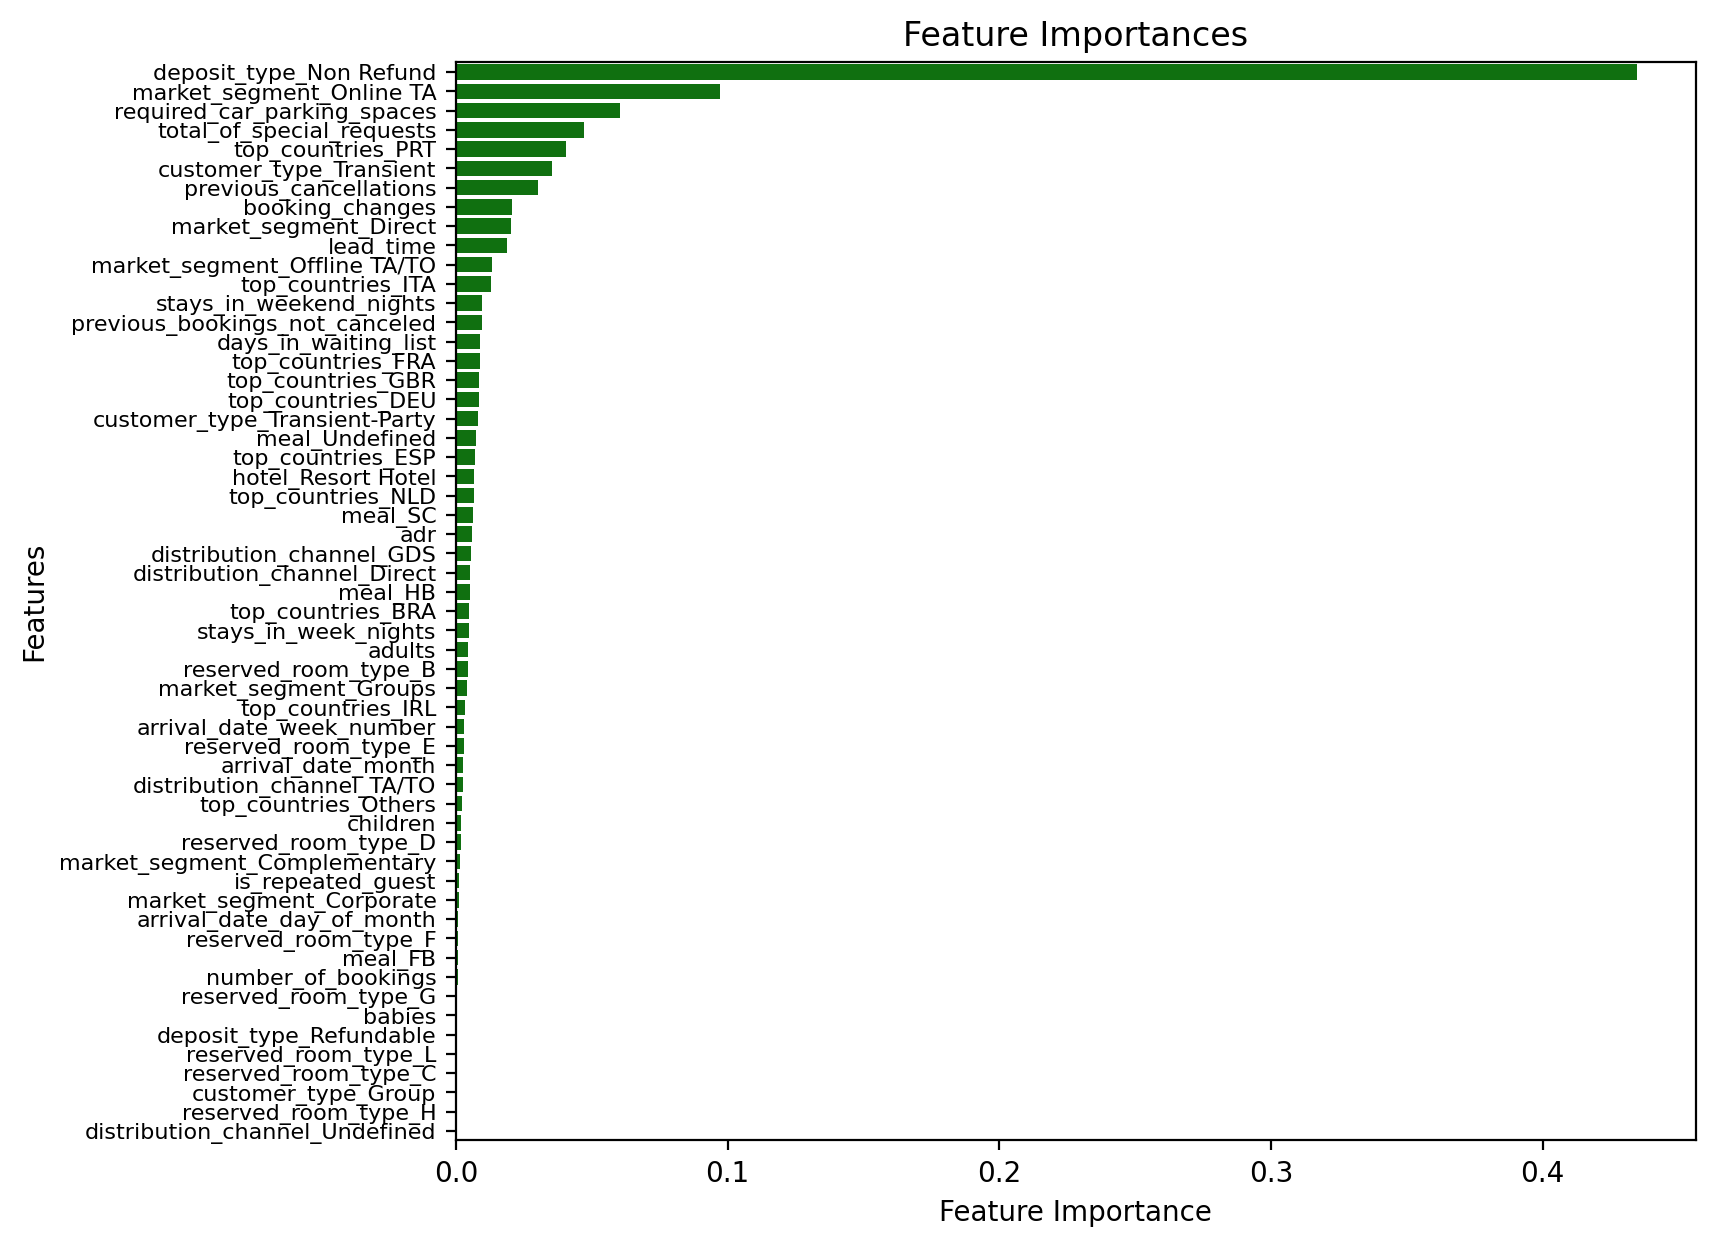

In [78]:
# Compute feature importances
feature_importances = xgb1.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(8, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.yticks(fontsize=8)
plt.show()

# *Final interpretation*:

# **Recommendations for Improving Hotel Booking Cancellations**

Based on the analysis of my cancellation prediction model, here are some key recommendations for consideration:

## 1. Deposit Type as a Confirmation:

 While the importance of deposit type is well-established,  our model further validates this by highlighting it as the most influential feature.  This reinforces the effectiveness of our methodology and suggests that a strong deposit policy can deter cancellations.

## 2. Prioritizing Online Travel Agencies (OTAs):

The model identifies the OTA used for booking as a significant factor in predicting cancellations.  Therefore, ensuring a seamless booking experience and reliable online channels through OTAs is crucial. We should focus on maintaining strong partnerships with OTAs and ensuring a user-friendly booking process.

## 3. Addressing Car Parking Requests Promptly:

The model highlights the importance of promptly addressing guest requests for car parking.  This suggests a potential correlation between unanswered parking requests and cancellations.  Therefore, it's vital to quickly inform receptionists of such requests and provide timely, relevant responses to retain customers.

## 4. Streamlining Guest Communication:

The model's insights suggest that prompt and efficient communication with guests can reduce cancellations.  This emphasizes the importance of having a responsive system for addressing guest inquiries and concerns. We should strive to answer all requests as quickly as possible to build trust and reduce the likelihood of cancellations due to unanswered questions.

## 5. Targeting Clientele from Portugal:

The model indicates that bookings from Portuguese guests may have a higher cancellation rate.  Further research might be needed to understand the reasons behind this trend.  However, this suggests that tailoring marketing or communication strategies to address potential concerns of Portuguese guests could be beneficial.

## 6. Identifying "Transient" Customers:

The model suggests that the "transient type customer" might be more likely to cancel, as I understand this type of client as a one-time 'passage'.  Understanding the characteristics of transient guests could allow for targeted marketing or communication strategies to reduce cancellations from this segment.

## 7. Analyzing Guest Cancellation History:

The model's performance suggests that past cancellation behavior might be a valuable predictor of future cancellations.  Exploring techniques to analyze guest history could help identify guests with a higher cancellation risk, allowing for targeted interventions or adjustments to booking policies.

## 8. Monitoring Booking Modifications:

Changes made to bookings may be indicative of potential cancellations.  Our model suggests that monitoring booking modifications could be an additional factor to consider in predicting cancellations.

## 9. Direct Bookings vs. Online Bookings:

The model's performance indicates that bookings made directly, as I understand at the front desk, might influence cancellations.

## 10. Booking Lead Time:

The time between booking and arrival date might be a relevant factor in predicting cancellations.  The model suggests that the lead time could be incorporated into the cancellation prediction model.   
This could allow for more targeted communication strategies based on how far in advance a booking is made.

By implementing these recommendations and further refining the model, we can potentially improve our ability to predict cancellations and take proactive measures to retain bookings, increasing hotel occupancy and revenue.

----------

### *Save the model*

In [79]:
import pickle
from joblib import dump

# Save model using pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(grid_search1.best_estimator_, f)
